In [90]:
import pandas as pd

# Synthetic Data Generation and Analysis

In [91]:
# Number of subjects
n = 10000

### Fake client dataset generation 

In [92]:
# Generate a random dataset
%run utils/Generator.py
data = generate_banking_dataset(n)

In [93]:
# Apply corrections and introduce correlation
%run utils/Correlation.py
correlate_balance_employment_type(data)
correlate_balance_region(data)
correlate_tot_transaction_amount_credit_score(data)

In [94]:
# Export of the dataset
RD = pd.DataFrame(data)
RD.to_csv('../data/real_data/d1.csv', index=False)

### Metadata Generation

In [95]:
# Generate metadata
%run utils/Generator.py
metadata = generate_metadata_mt(RD)

In [97]:
# Export metadata json
metadata.save_to_json('../data/metadata/metadata_mt_d1.json')

### HMA Model Fitting

In [99]:
%run models/mt_HMA.py
SD = HMA(RD, metadata)

c:\Users\david\miniconda3\envs\SDV_env\lib\site-packages\rdt\transformers\numerical.py:100: UserWarning: No rounding scheme detected for column 'Credit_Score'. Data will not be rounded.
  warnings.warn(


In [100]:
# Export synthetic dataset
SD['d1'].to_csv('../data/synthetic_data/HMA_d1.csv', index=False)
SD = pd.DataFrame(SD['d1'])

### Visualization

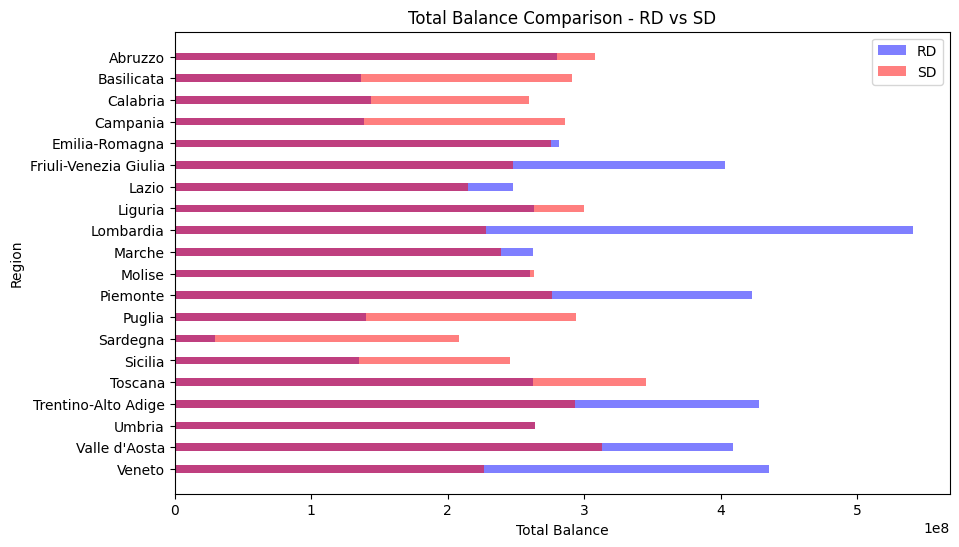

In [101]:
# Region VS Balance dependency replication
%run utils/Visualisation.py
plot_region_balance_comparison(RD, SD)

Failed: HMA Synthetic data do not replicate Real data